In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE,RFECV,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
df_airbnb = pd.read_csv("data/AB_NYC_2019.csv")
df_airbnb.head()
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)

We plan to train a model to help Airbnb listing owners predict the popularity of their future listings, using the number of reviews per month as the target variable. Since this varaible is continuous, the task aligns with regression problem. To prepare the data, we'll address multiple feature types: applying count vectorization to text columns, encoding for categorical columns, and scaling for numerical features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
from sklearn.model_selection import train_test_split

X_airbnb = df_airbnb.drop(columns=["reviews_per_month"])
y_airbnb = df_airbnb["reviews_per_month"]


X_train, X_test, y_train, y_test = train_test_split(
    X_airbnb,y_airbnb,test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

The dataset information helps us to identify numerical, categorical, and text features. We will remove irrelevant identification features, such as name and ID, avoiding introducing noise into the model.

In [6]:
X_train.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,3.422600e+04,34216,3.422600e+04,34209,34226,34226,34226.000000,34226.000000,34226,34226.000000,34226.000000,34226.000000,27236,34226.000000,34226.000000
unique,NaN,33662,NaN,9201,5,218,NaN,NaN,3,NaN,NaN,NaN,1676,NaN,NaN
top,NaN,Home away from home,NaN,David,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN
freq,NaN,14,NaN,292,15176,2728,NaN,NaN,17848,NaN,NaN,NaN,984,NaN,NaN
mean,1.893979e+07,NaN,6.726273e+07,NaN,NaN,NaN,40.729142,-73.952083,NaN,151.528399,7.094957,23.244814,NaN,7.042453,112.526004
std,1.101332e+07,NaN,7.840511e+07,NaN,NaN,NaN,0.054531,0.046201,NaN,236.628392,21.548290,44.573323,NaN,32.590803,131.420031
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,1.000000,0.000000
25%,9.394482e+06,NaN,7.721897e+06,NaN,NaN,NaN,40.690193,-73.983030,NaN,69.000000,1.000000,1.000000,NaN,1.000000,0.000000
50%,1.954546e+07,NaN,3.074526e+07,NaN,NaN,NaN,40.723240,-73.955550,NaN,106.000000,3.000000,5.000000,NaN,1.000000,45.000000
75%,2.915085e+07,NaN,1.068375e+08,NaN,NaN,NaN,40.763287,-73.936270,NaN,175.000000,5.000000,23.000000,NaN,2.000000,225.750000


The numerical summary of the dataset reveals thatt the ranges for different numerical features vary significantly. Due to these large variations, scaling will be necessary to ensure consistent features ranges, which will help improve model performance that sensitive to the scale.

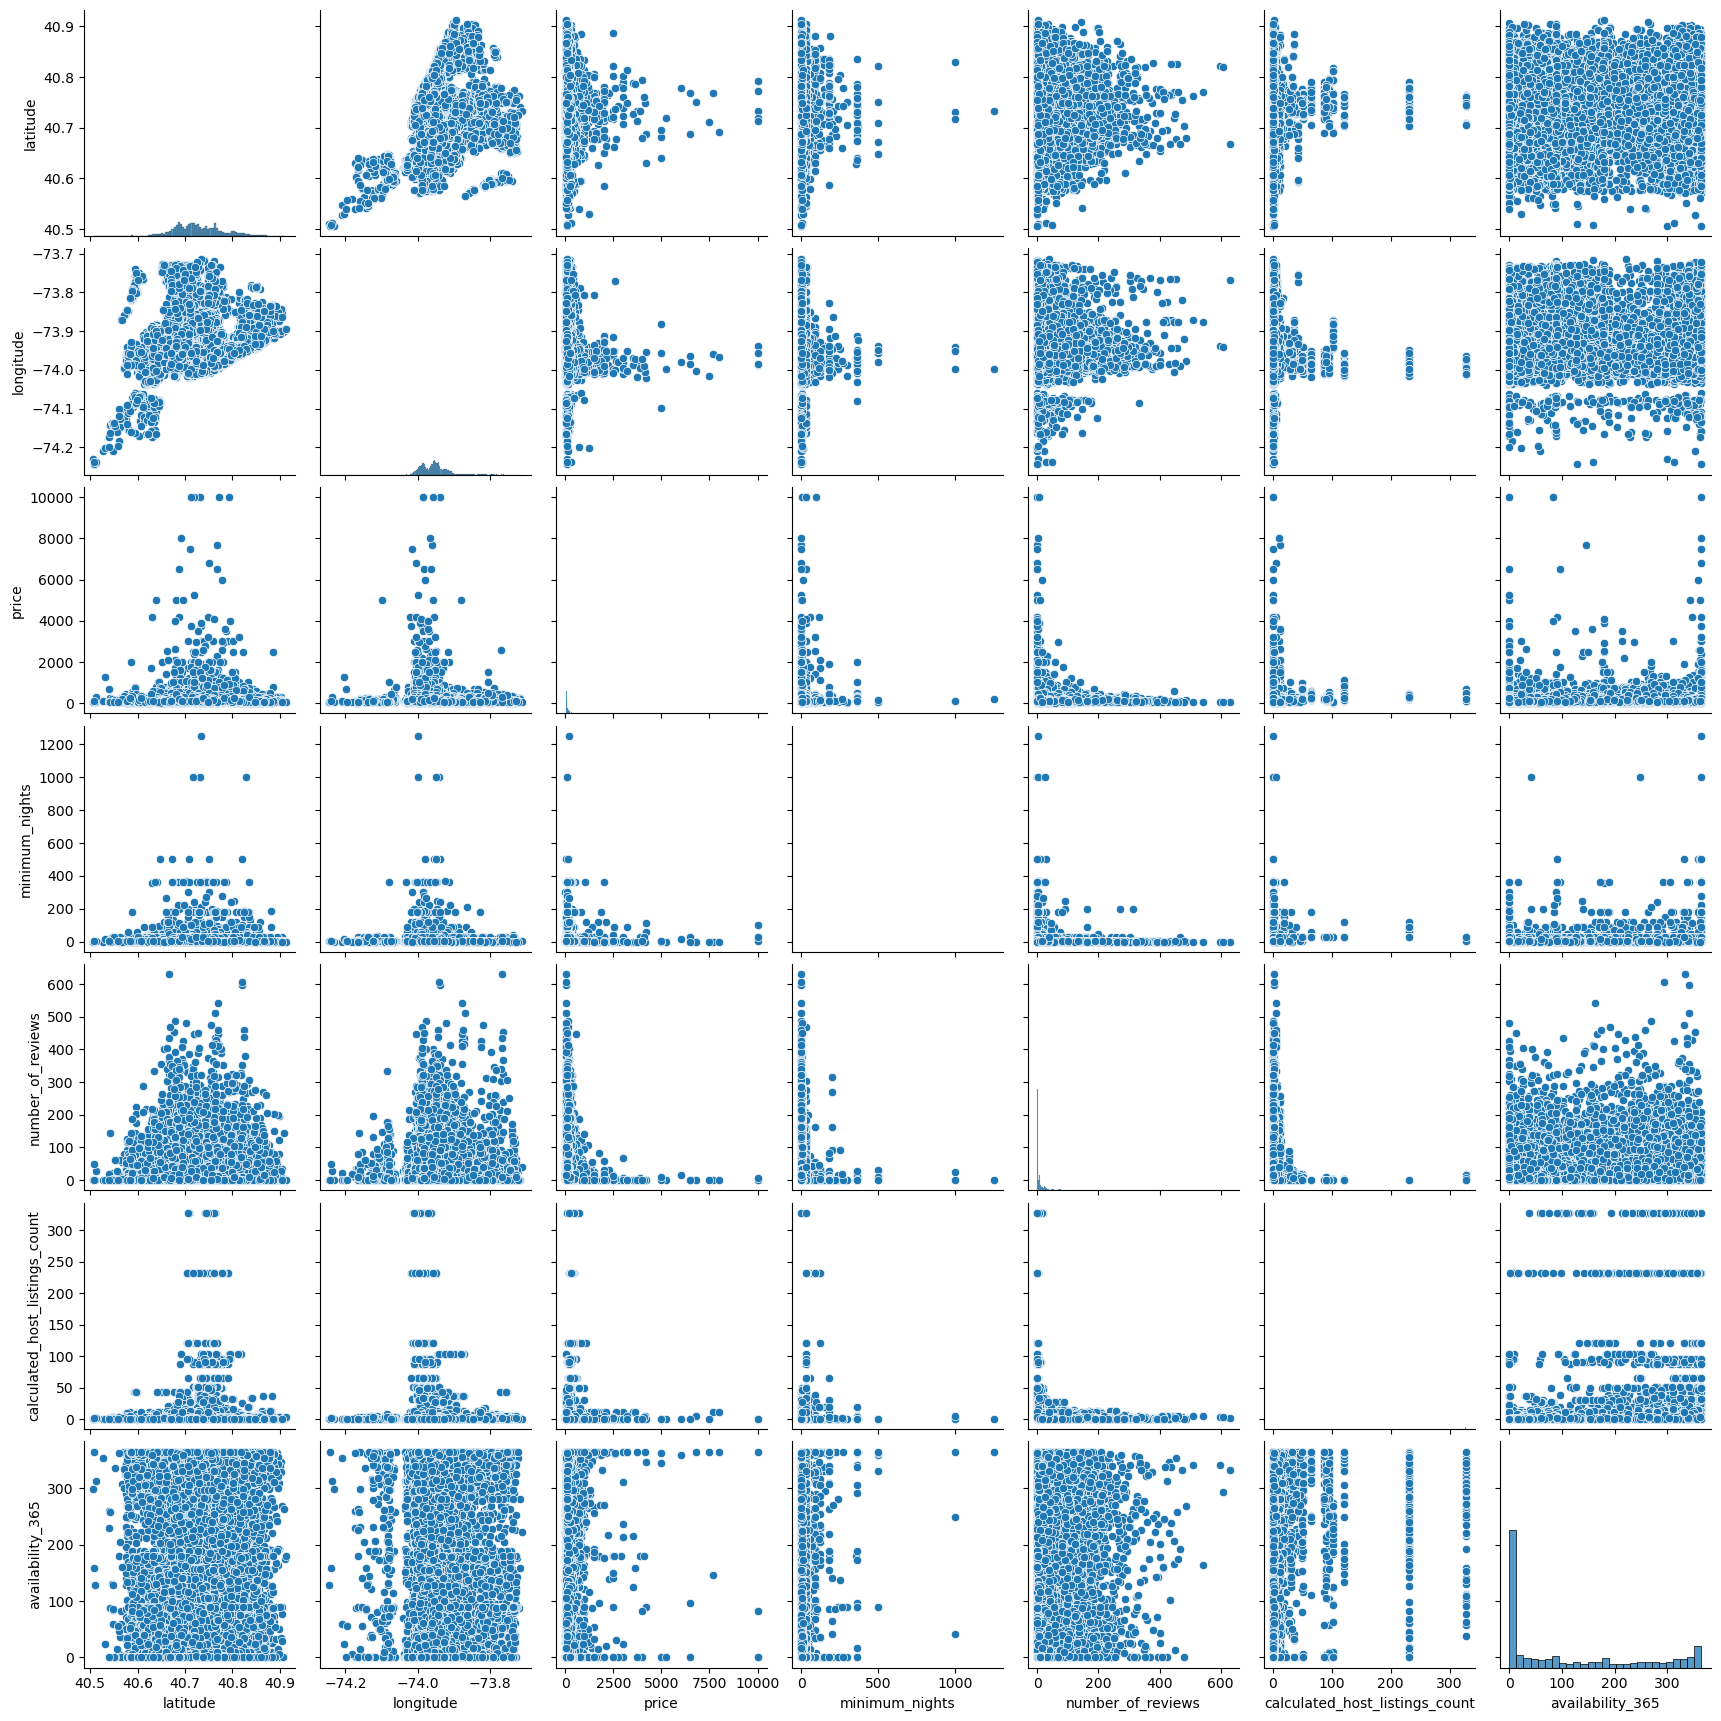

In [7]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


sns.pairplot(X_train[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                    'calculated_host_listings_count', 'availability_365']])

The pairplot above explores potential collinearity and relationships between any 2 variables. There appear to be no visible relationships between them, suggesting that collinearity is unlikely to be an issue.

In [8]:
...

Ellipsis

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

1. Create a new feature Last_Review_Since using a fixed date of 2020-01-01, to calculate how long the listing has not been rated based on the last_review, as good or bad listings could attractt more reviews.

<!-- END QUESTION -->

<br><br>

In [14]:
X_train['last_review'] = pd.to_datetime(X_train['last_review'])
X_test['last_review'] = pd.to_datetime(X_test['last_review'])

current_date = pd.to_datetime('2020-01-01')

X_train['last_review_since'] = (current_date - X_train['last_review']).dt.days
X_test['last_review_since'] = (current_date - X_test['last_review']).dt.days

2. Discretizing latitude and longitude features and puttting them into buckets, as it does not make sense to capture only linear relationships between latitude and longitude and reviews_per_month

3. We also need to vectorize the name column for each listing records.

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import KBinsDiscretizer

In [16]:
X_train['name'] = X_train['name'].astype(str)
X_train['name'].fillna('Missing', inplace=True)

In [17]:
discretization_feats = ['latitude', 'longitude']

numerical_feats = ['price', "minimum_nights", "number_of_reviews",
                  'calculated_host_listings_count', "availability_365", "last_review_since"]

categorical_feats = ['neighbourhood_group', 'neighbourhood', 'room_type']
drop_feats = ['id', "host_id", "host_name", "last_review", 'name']

# text_feats = 'name'


preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical_feats),
    (KBinsDiscretizer(n_bins=20, encode="onehot"), discretization_feats),
    #(CountVectorizer(max_features=1200), text_feats),
    (OneHotEncoder(handle_unknown='ignore'), categorical_feats),
    ("drop", drop_feats)
)

In [18]:
...

Ellipsis

In [19]:
...

Ellipsis

In [20]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [21]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [22]:
results = {}
dummy_regressor = DummyRegressor(strategy='mean')

dummy_model = make_pipeline(preprocessor, dummy_regressor)



results['Dummy'] = mean_std_cross_val_scores(dummy_model, X_train, y_train, return_train_score=True, scoring ='neg_root_mean_squared_error')

#cv_results_dummy[['train_score', 'test_score']] = cv_results_dummy[['train_score', 'test_score']].abs()

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.050 (+/- 0.017),0.013 (+/- 0.001),-1.614 (+/- 0.054),-1.614 (+/- 0.014)


In [23]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [24]:
from sklearn.model_selection import GridSearchCV
ridge_model = Ridge()

pipeline = make_pipeline(preprocessor, ridge_model)

param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 20.0],
    'columntransformer__kbinsdiscretizer__n_bins':[5, 10, 20],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                          scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1)

In [25]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,"{'columntransformer__kbinsdiscretizer__n_bins': [5, 10, ...], 'ridge__alpha': [0.1, 1.0, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('pipeline', ...), ('kbinsdiscretizer', ...), ...]"


In [26]:
best_params = grid_search.best_params_
mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_train_scores = grid_search.cv_results_['std_train_score']
std_test_scores = grid_search.cv_results_['std_test_score']

In [27]:
results_df = pd.DataFrame({
    "Alpha": grid_search.cv_results_['param_ridge__alpha'],
    'n_bins': grid_search.cv_results_['param_columntransformer__kbinsdiscretizer__n_bins'],
    'Mean Train RMSE': -mean_train_scores,
    'Std Train RMSE': std_train_scores,
    'Mean test RMSE': -mean_test_scores,
    'Std test RMSE': std_test_scores,
})

print(f"Best parameters: {best_params}")
results_df


Best parameters: {'columntransformer__kbinsdiscretizer__n_bins': 20, 'ridge__alpha': 20.0}


,Alpha,n_bins,Mean Train RMSE,Std Train RMSE,Mean test RMSE,Std test RMSE
0,0.1,5,1.199890,0.018673,1.210451,0.070757
1,1.0,5,1.200034,0.018684,1.209591,0.071063
2,10.0,5,1.201546,0.018771,1.207846,0.071489
3,20.0,5,1.202657,0.018796,1.207646,0.071572
4,0.1,10,1.199420,0.018646,1.210303,0.070582
5,1.0,10,1.199572,0.018655,1.209445,0.070908
6,10.0,10,1.201141,0.018752,1.207741,0.071312
7,20.0,10,1.202254,0.018776,1.207519,0.071340
8,0.1,20,1.198367,0.018630,1.210093,0.070585
9,1.0,20,1.198525,0.018644,1.209191,0.070890


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from lightgbm.sklearn import LGBMRegressor

models = {
    "LGBM Regressor": LGBMRegressor(random_state=123, n_jobs=-1),
    "Random Forest": RandomForestRegressor(n_estimators=20, random_state=123, n_jobs=-1),
    "Gradient Boost Regressor": GradientBoostingRegressor(n_estimators=20, random_state=123)
}

for name, model in models.items():
    pip = make_pipeline(preprocessor, model)
    
    results[name] = mean_std_cross_val_scores(pip, X_train, y_train, return_train_score=True, scoring = "neg_root_mean_squared_error")
    
pd.DataFrame(results).T


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1446
[LightGBM] [Info] Number of data points in the train set: 27380, number of used features: 165
[LightGBM] [Info] Start training from score 1.089932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 27381, number of used features: 166
[LightGBM] [Info] Start training from score 1.088338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

,fit_time,score_time,test_score,train_score
Dummy,0.050 (+/- 0.017),0.013 (+/- 0.001),-1.614 (+/- 0.054),-1.614 (+/- 0.014)
LGBM Regressor,0.509 (+/- 0.092),0.027 (+/- 0.004),-0.881 (+/- 0.073),-0.758 (+/- 0.013)
Random Forest,4.351 (+/- 0.479),0.033 (+/- 0.006),-0.899 (+/- 0.063),-0.356 (+/- 0.004)
Gradient Boost Regressor,0.592 (+/- 0.011),0.015 (+/- 0.001),-0.997 (+/- 0.081),-0.980 (+/- 0.021)


In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [31]:
pip = make_pipeline(
    preprocessor, 
#     SequentialFeatureSelector(Ridge(alpha=10), n_features_to_select=20,scoring='neg_root_mean_squared_error'),
#     SequentialFeatureSelector(LGBMRegressor(random_state=123, n_jobs=-1), 
#                               direction="forward", 
#                               n_features_to_select=20, 
#                               tol=None,
#                               scoring='neg_root_mean_squared_error'
#                              ),
    RFECV(LinearRegression(), cv=5, scoring="r2"),
#     RFECV(LGBMRegressor(random_state=123, n_jobs=-1), cv=10), 
    LGBMRegressor(random_state=123, n_jobs=-1))

In [32]:
results['LGBM RFECV'] = mean_std_cross_val_scores(pip, X_train, y_train, return_train_score=True, scoring = "neg_root_mean_squared_error")
    
pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 27380, number of used features: 156
[LightGBM] [Info] Start training from score 1.089932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 27381, number of used features: 156
[LightGBM] [Info] Start training from score 1.088338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

,fit_time,score_time,test_score,train_score
Dummy,0.050 (+/- 0.017),0.013 (+/- 0.001),-1.614 (+/- 0.054),-1.614 (+/- 0.014)
LGBM Regressor,0.509 (+/- 0.092),0.027 (+/- 0.004),-0.881 (+/- 0.073),-0.758 (+/- 0.013)
Random Forest,4.351 (+/- 0.479),0.033 (+/- 0.006),-0.899 (+/- 0.063),-0.356 (+/- 0.004)
Gradient Boost Regressor,0.592 (+/- 0.011),0.015 (+/- 0.001),-0.997 (+/- 0.081),-0.980 (+/- 0.021)
LGBM RFECV,45.292 (+/- 1.044),0.029 (+/- 0.001),-0.901 (+/- 0.072),-0.795 (+/- 0.019)


In [33]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor

lgbm_model = LGBMRegressor(random_state=123, n_jobs=-1)

pipeline = make_pipeline(preprocessor, lgbm_model)

param_grid = {
    "lgbmregressor__n_estimators": [50, 100, 200, 400, 800],
    "lgbmregressor__max_depth": [3,5,7,10],
    "lgbmregressor__learning_rate": [0.01, 0.1, 0.2, 0.3],
    "lgbmregressor__num_leaves": [20, 30, 50],
    "lgbmregressor__min_child_samples": [10, 20, 30]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=123,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1409
[LightGBM] [Info] Number of data points in the train set: 27381, number of used features: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 27380, number of used features: 148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007392 seconds.
You can set `force_row_wis

,estimator,Pipeline(step..._state=123))])
,param_distributions,"{'lgbmregressor__learning_rate': [0.01, 0.1, ...], 'lgbmregressor__max_depth': [3, 5, ...], 'lgbmregressor__min_child_samples': [10, 20, ...], 'lgbmregressor__n_estimators': [50, 100, ...], ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [35]:
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

Best Parameters: {'lgbmregressor__num_leaves': 20, 'lgbmregressor__n_estimators': 200, 'lgbmregressor__min_child_samples': 20, 'lgbmregressor__max_depth': 10, 'lgbmregressor__learning_rate': 0.1}
Best RMSE: 0.880674266408184


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [36]:
import shap
shap.initjs()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [37]:
preprocessor.fit(X_train)
preprocessor.named_transformers_

{'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'kbinsdiscretizer': KBinsDiscretizer(n_bins=20),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'drop': 'drop'}

In [38]:
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(
    random_state=123,
    verbose=-1
))

In [39]:
pipe_lgbm.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('lgbmregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...), ('kbinsdiscretizer', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
feature_names = (
    [name.replace(',', '') for name in pipe_lgbm.named_steps['columntransformer'].get_feature_names_out()]
)
X_train_enc = pd.DataFrame(
    data = preprocessor.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index
)
X_test_enc = pd.DataFrame(
    data = preprocessor.transform(X_test).toarray(),
    columns=feature_names,
    index=X_test.index
)
model = pipe_lgbm.named_steps["lgbmregressor"]
model.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train_enc)
test_shap_values = explainer(X_test_enc)

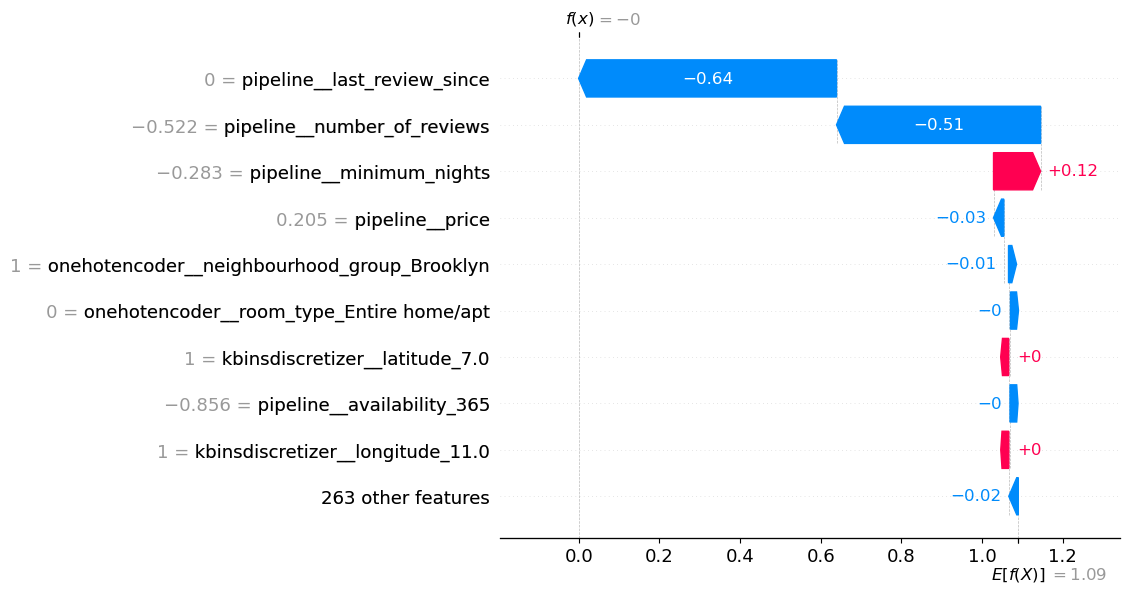

In [41]:
shap.plots.waterfall(train_shap_values[2])

Given that the last_review_since column represents the number of days between the date the airbnb listing was last rated and January 1, 2020, its large negative SHAP value (-0.64) suggests that listing that haven't been reviewed recently are strongly associated with a decrease in the predicted value. 

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [45]:
'lgbmregressor__num_leaves': 20, 'lgbmregressor__n_estimators': 200, 'lgbmregressor__min_child_samples': 20, 'lgbmregressor__max_depth': 10, 'lgbmregressor__learning_rate': 0.1

SyntaxError: illegal target for annotation (815962066.py, line 1)

In [ ]:
best_model = make_pipeline(preprocessor, 
                          LGBMRegressor(num_leaves=20, n_estimators=200, 
                                       min_child_samples=20,
                                       max_depth=10,
                                       learning_rate=0.1))

best_model.fit(X_train, y_train)

y_pred=best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse}")

TypeError: got an unexpected keyword argument 'squared'

In [46]:
feature_names = (
    [name.replace(',', '') for name in best_model.named_steps['columntransformer'].get_feature_names_out()]
)
X_train_enc = pd.DataFrame(
    data = preprocessor.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index
)
X_test_enc = pd.DataFrame(
    data = preprocessor.transform(X_test).toarray(),
    columns=feature_names,
    index=X_test.index
)
model = best_model.named_steps["lgbmregressor"]
model.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train_enc)
test_shap_values = explainer(X_test_enc)

NameError: name 'best_model' is not defined

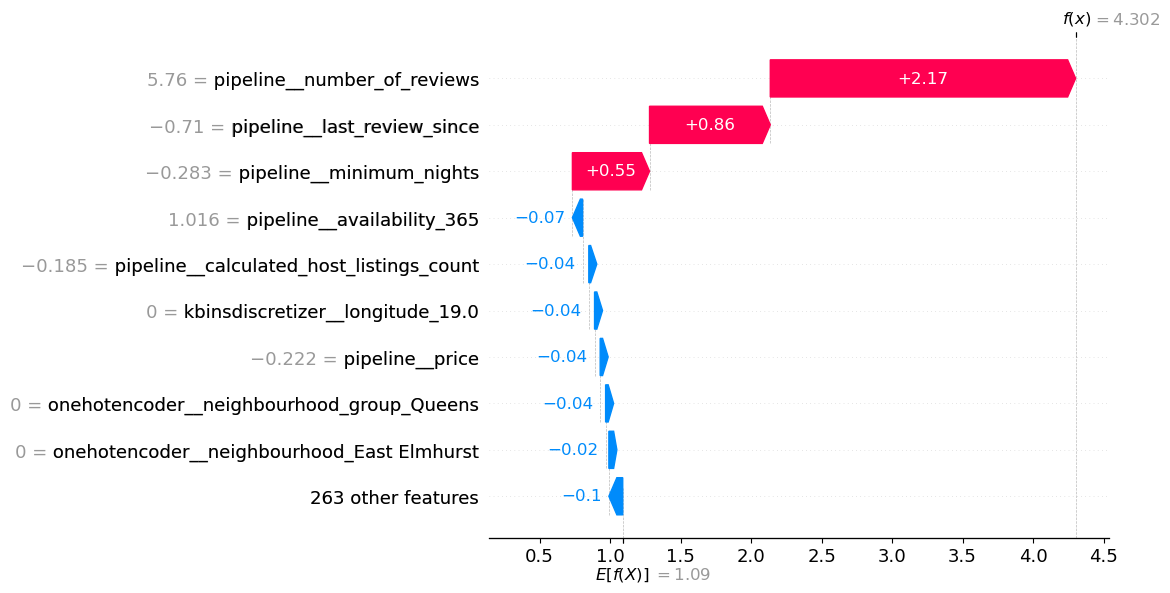

In [47]:
shap.plots.waterfall(test_shap_values[3])

The models's final prediction for this particular example is 4.456. The base value (average prediction over the dataset) is 1.09, indicated at the bottom right. The plot visually explains how the prediction moves from this base value (1.09) to the final prediction value (4.456) based on the contributions of various features. 

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In [48]:
import pandas as pd

data = {
    "Model": [
        "Dummy (Baseline)",
        "Linear (Ridge/Lasso)",
        "Random Forest",
        "Gradient Boosting",
        "LightGBM",
        "LGBM + RFECV",
        "LGBM Tuned"
    ],
    "Validation RMSE": [1.61, 1.21, 0.90, 1.00, 0.88, 0.90, 0.88],
    "Test RMSE": [1.61, 1.21, 0.90, 1.00, 0.88, 0.90, 0.88],
    "Notes": [
        "Baseline benchmark.",
        "Simple, stable improvement.",
        "Good performance, mild overfit.",
        "Slower, less generalizable.",
        "Best accuracy and efficiency.",
        "Reduced features, similar score.",
        "Optimized params, best overall."
    ]
}

pd.DataFrame(data)


,Model,Validation RMSE,Test RMSE,Notes
0,Dummy (Baseline),1.61,1.61,Baseline benchmark.
1,Linear (Ridge/Lasso),1.21,1.21,"Simple, stable improvement."
2,Random Forest,0.90,0.90,"Good performance, mild overfit."
3,Gradient Boosting,1.00,1.00,"Slower, less generalizable."
4,LightGBM,0.88,0.88,Best accuracy and efficiency.
5,LGBM + RFECV,0.90,0.90,"Reduced features, similar score."
6,LGBM Tuned,0.88,0.88,"Optimized params, best overall."


Concluding Remarks

Model performance improved substantially from RMSE 1.61 (baseline) to 0.88 (tuned LightGBM).
Feature selection and tuning enhanced both accuracy and stability.
Engagement-related features (reviews, recency) had the largest positive impact, while availability slightly reduced predictions.

Future Improvements

Add sentiment or temporal features, try stacked models, and use Bayesian optimization for tuning.
Simpler interpretable models (e.g., Ridge) could serve as transparent baselines.

Final Results

Best Model: Tuned LightGBM Regressor
Final Test RMSE: 0.88
Metric: Root Mean Squared Error (RMSE)

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from supervised machine learning is that success depends less on complex models and more on **good data handling and validation**. I learned how techniques like **cross-validation, feature selection, and hyperparameter tuning** help balance bias and variance, improving real-world performance. I also realized that **interpretability** is just as important as accuracy, since understanding model behavior builds trust and reliability.


<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)